### CT421

### Assignment1 PartA

##### Yiheng Jiang 19280059

In [14]:
# import useful packages
import random
import matplotlib.pyplot as plt

### i) One-max problem

In [15]:
# this is a function to calculate the fitness of given individual
# by deafualt counting the number of 1s
def calc_fitness_onemax(individual):
    return individual.count(1)

In [16]:
# this is a function to perform a one point crossover
def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    # combine the 2 parents based on random crossover point
    child1PartA = parent1[:crossover_point]
    child1PartB = parent2[crossover_point:]
    child2PartA = parent2[:crossover_point]
    child2PartB = parent1[crossover_point:]
    return child1PartA + child1PartB, child2PartA + child2PartB

In [17]:
# this is a function to perform a standard mutation
# the mutation probability is set to 1/length of child
def starndard_mutation(child):
    mutation_probability = 1 / len(child)
    for n in range(len(child)):
        if(random.random() < mutation_probability):
            if(child[n] == 0):
                child[n] = 1
            else:
                child[n] = 0
    return child

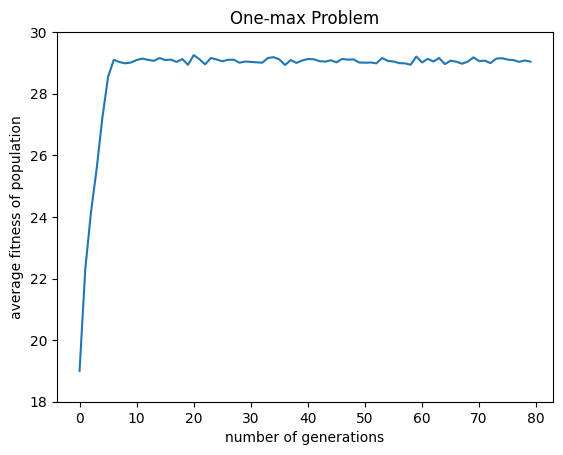

In [18]:
# create the population
population = []

# used to plot the fitness
fitness_scores = []

# configure the experiment
population_size = 150
generation = 80
individual_size = 30
elite_size = 10
reproduction_size = int((population_size - elite_size) / 2)

# generate the initial population
for n in range(population_size):
    individual = []
    for m in range(individual_size):
        individual.append(random.randint(0, 1))
    population.append(individual)

# run the experiment
for m in range(generation):
    population_ordered = sorted(population, key=calc_fitness_onemax, reverse=True)
    elite = population_ordered[:elite_size]
    # reproduction process:
    children = []
    population = []
    for o in range(reproduction_size):
        parent1 = random.choice(elite)
        parent2 = random.choice(elite)
        child1, child2 = one_point_crossover(parent1, parent2)
        child1 = starndard_mutation(child1)
        child2 = starndard_mutation(child2)
        children.append(child1)
        children.append(child2)
    # generate a new population of children and parents
    population = children + elite
    # append avg fitness to list
    fitness_score = 0
    for p in range(population_size):
        fitness_score += (calc_fitness_onemax(population[p]) / population_size)
    fitness_scores.append(fitness_score)

# plot the result
plt.plot(fitness_scores)
plt.title("One-max Problem")
plt.xlabel("number of generations")
plt.ylabel("average fitness of population")
plt.ylim([18, 30])
plt.show()

### ii) Evolve to a Target String

In [19]:
# this is a function to calculate the fitness of given individual
# by comparing with a target individual
def calc_fitness_target(individual, target):
    fitness = 0
    for n in range(len(individual)):
        if(individual[n] == target[n]):
            fitness += 1
    return fitness

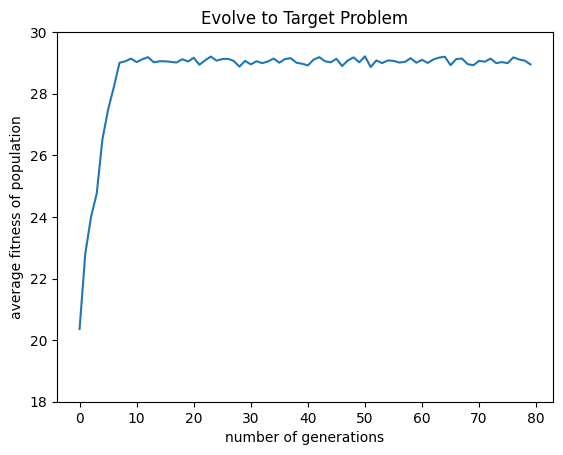

In [20]:
# refresh the population
population = []

# refresh fitness records
fitness_scores = []

# generate the initial population
for n in range(population_size):
    individual = []
    for m in range(individual_size):
        individual.append(random.randint(0, 1))
    population.append(individual)
    
# create the target
target = []
for a in range(population_size):
    target.append(random.randint(0, 1))
    
# run the experiment
for m in range(generation):
    population_ordered = sorted(population, key=lambda x: calc_fitness_target(x, target), reverse=True)
    elite = population_ordered[:elite_size]
    # reproduction process:
    children = []
    population = []
    for o in range(reproduction_size):
        parent1 = random.choice(elite)
        parent2 = random.choice(elite)
        child1, child2 = one_point_crossover(parent1, parent2)
        child1 = starndard_mutation(child1)
        child2 = starndard_mutation(child2)
        children.append(child1)
        children.append(child2)
    # generate a new population of children and parents
    population = children + elite
    # append avg fitness to list
    fitness_score = 0
    for p in range(population_size):
        fitness_score += (calc_fitness_target(population[p], target) / population_size)
    fitness_scores.append(fitness_score)

# plot the result
plt.plot(fitness_scores)
plt.title("Evolve to Target Problem")
plt.xlabel("number of generations")
plt.ylabel("average fitness of population")
plt.ylim([18, 30])
plt.show()

### iii) Deceptive Landscape

In [21]:
# this is the fitness function with deception
def calc_fitness_deceptive(individual):
    one_count = individual.count(1)
    if(one_count == 0):
        #if no 1 given, the fitness is 2 * length
        return (len(individual) * 2)
    else:
        return one_count

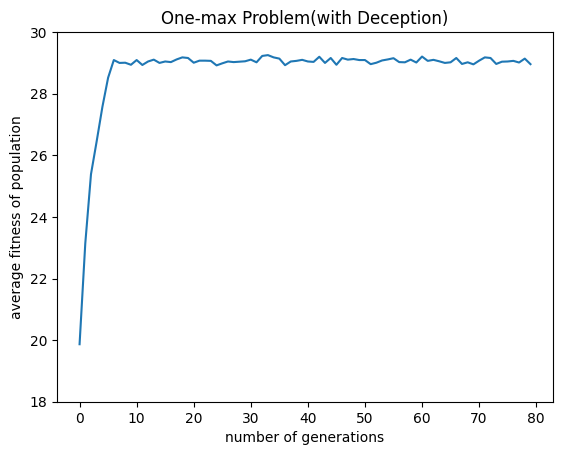

In [22]:
# refresh the population
population = []

# used to plot the fitness
fitness_scores = []

# generate the initial population
for n in range(population_size):
    individual = []
    for m in range(individual_size):
        individual.append(random.randint(0, 1))
    population.append(individual)

# run the experiment
for m in range(generation):
    population_ordered = sorted(population, key=calc_fitness_deceptive, reverse=True)
    elite = population_ordered[:elite_size]
    # reproduction process:
    children = []
    population = []
    for o in range(reproduction_size):
        parent1 = random.choice(elite)
        parent2 = random.choice(elite)
        child1, child2 = one_point_crossover(parent1, parent2)
        child1 = starndard_mutation(child1)
        child2 = starndard_mutation(child2)
        children.append(child1)
        children.append(child2)
    # generate a new population of children and parents
    population = children + elite
    # append avg fitness to list
    fitness_score = 0
    for p in range(population_size):
        fitness_score += (calc_fitness_deceptive(population[p]) / population_size)
    fitness_scores.append(fitness_score)

# plot the result
plt.plot(fitness_scores)
plt.title("One-max Problem(with Deception)")
plt.xlabel("number of generations")
plt.ylabel("average fitness of population")
plt.ylim([18, 30])
plt.show()

### iv) Evolving to a Target String with a Larger Alphabet

In [23]:
# this is a function to perform a mutation with larger alphabet
# the mutation probability is set to 1/length of child
def larger_alphabet_mutation(child):
    mutation_probability = 1 / len(child)
    for n in range(len(child)):
        if(random.random() < mutation_probability):
            # mutate till a different value
            mutation_result = child[n]
            while(mutation_result == child[n]):
                mutation_result = random.randint(0, 9)
            child[n] = mutation_result
    return child

[0, 5, 0, 6, 6, 2, 8, 4, 8, 2, 5, 8, 9, 1, 2, 6, 7, 9, 7, 3, 3, 5, 5, 7, 9, 2, 1, 1, 7, 7]
[0, 5, 0, 6, 6, 2, 8, 4, 8, 2, 5, 8, 9, 1, 2, 6, 7, 9, 7, 3, 3, 5, 5, 7, 9, 2, 1, 1, 7, 7]


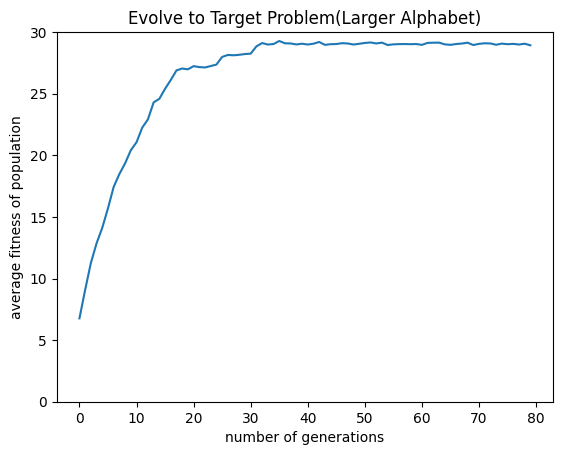

In [24]:
# refresh the population
population = []

# refresh fitness records
fitness_scores = []

# generate the initial population
for n in range(population_size):
    individual = []
    for m in range(individual_size):
        individual.append(random.randint(0, 9))
    population.append(individual)

# create the target
target = []
for a in range(individual_size):
    target.append(random.randint(0, 9))

print(str(target))
    
# run the experiment
for m in range(generation):
    population_ordered = sorted(population, key=lambda x: calc_fitness_target(x, target), reverse=True)
    elite = population_ordered[:elite_size]
    # reproduction process:
    children = []
    population = []
    for o in range(reproduction_size):
        parent1 = random.choice(elite)
        parent2 = random.choice(elite)
        child1, child2 = one_point_crossover(parent1, parent2)
        child1 = larger_alphabet_mutation(child1)
        child2 = larger_alphabet_mutation(child2)
        children.append(child1)
        children.append(child2)
    # generate a new population of children and parents
    population = children + elite
    # append avg fitness to list
    fitness_score = 0
    for p in range(population_size):
        fitness_score += (calc_fitness_target(population[p], target) / population_size)
    fitness_scores.append(fitness_score)

print(str(population[0]))
    
# plot the result
plt.plot(fitness_scores)
plt.title("Evolve to Target Problem(Larger Alphabet)")
plt.xlabel("number of generations")
plt.ylabel("average fitness of population")
plt.ylim([0, 30])
plt.show()

### To conclude, one-max problem converges very fast, even with deception, as its in binary form. Binary target string evolution also reaches convergence in only few generations. Evolution towards target gets many times slower when larger alphabet is used as it increases the data diversity.
### In addtion, during the parameter configuring of this experiment, it is found that with larger population, the generation number needed to reach convergence gets lower. This is believed to be the reason of better selection of elites in a generation for population reproduction, as both crossover and mutation creates better children faster than smaller population values.

# Other Conclusions see report!